In [112]:
!pip install opencv-python


<Figure size 1440x1440 with 0 Axes>

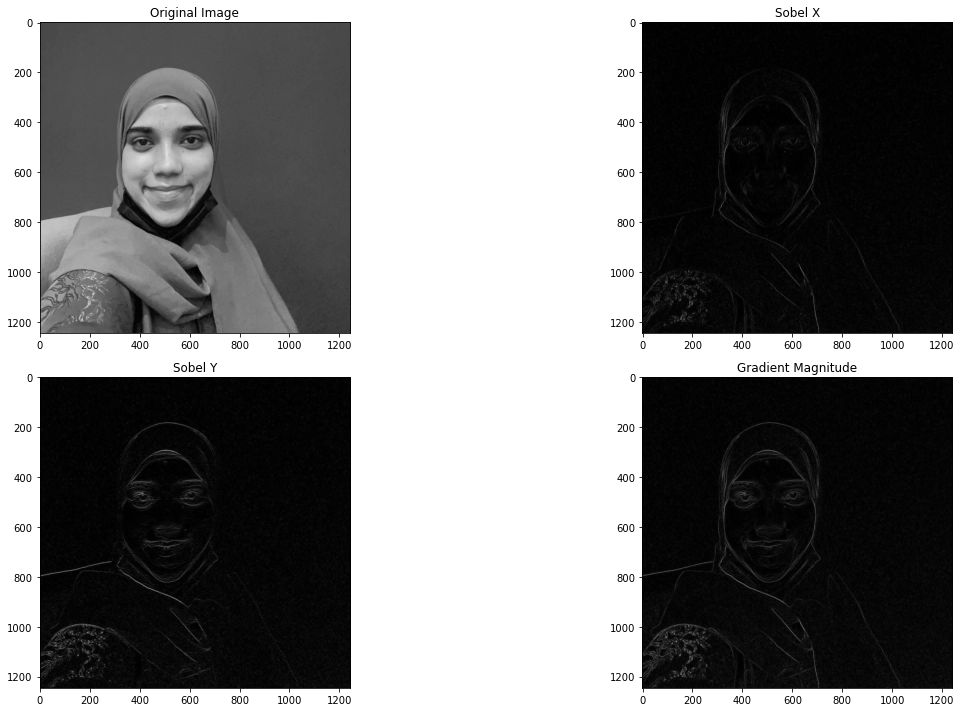

In [113]:
#sobel
import numpy as np
import cv2
import matplotlib.pyplot as plt


def sobel_operator(image):
    # Sobel kernels for horizontal and vertical edges
    kernel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    kernel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    # Apply convolution with the kernels
    grad_x = convolve(image, kernel_x)
    grad_y = convolve(image, kernel_y)

    # Combine the gradients to get the magnitude
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    return grad_x, grad_y, gradient_magnitude

def convolve(image, kernel):
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))

    # Get dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding required
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Create a padded image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')

    # Initialize the result
    result = np.zeros_like(image, dtype=np.float64)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            result[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return result

# Example usage
image = cv2.imread('madeeha.jpg', cv2.IMREAD_GRAYSCALE)
grad_x, grad_y, gradient_magnitude = sobel_operator(image)
plt.figure(figsize=(20, 20))

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(grad_x), cmap='gray')
plt.title('Sobel X')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(grad_y), cmap='gray')
plt.title('Sobel Y')

plt.subplot(2, 2, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.tight_layout()
plt.show()

In [114]:
#prewitt









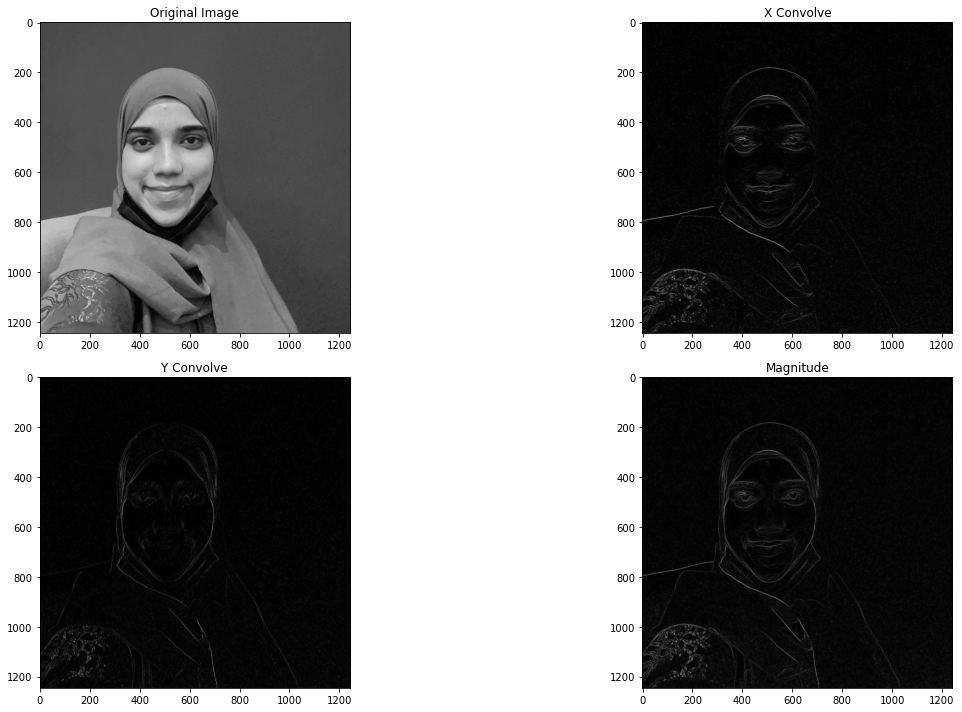

In [115]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt(image):
    xkernel = np.array([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

    ykernel = np.array([[-1, -1, -1],
                        [0, 0, 0],
                        [1, 1, 1]])

    xgradient = convolve(image, xkernel)
    ygradient = convolve(image, ykernel)

    magnitude = np.sqrt(xgradient**2 + ygradient**2)
    return xgradient, ygradient, magnitude

def convolve(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    img_height, img_width = image.shape
    ker_height, ker_width = kernel.shape
    padding_height = ker_height // 2
    padding_width = ker_width // 2
    image_padded = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='edge')
    fin_result = np.zeros_like(image, dtype=np.float64)

    for i in range(img_height):
        for j in range(img_width):
            fin_result[i, j] = np.sum(image_padded[i:i+ker_height, j:j+ker_width] * kernel)

    return fin_result

# Read the image
image = cv2.imread('madeeha.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the function prewitt and convolve
ygradient, xgradient, magnitude = prewitt(image)

# Display the results
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(xgradient), cmap='gray')
plt.title('X Convolve')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(ygradient), cmap='gray')
plt.title('Y Convolve')

plt.subplot(2, 2, 4)
plt.imshow(np.abs(magnitude), cmap='gray')
plt.title('Magnitude')

plt.tight_layout()
plt.show()

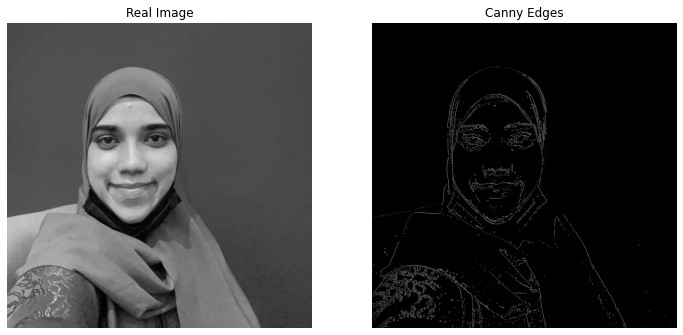

In [116]:
import cv2
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

def canny_edge(image, low_thresh, high_thresh):
    # Convert image to float64
    img_gray = image.astype(np.float64)

    # Apply Gaussian blur using OpenCV
    gauss_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # Calculating gradients using Sobel operators
    sob_x = convolve(gauss_blur, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), mode='constant', cval=0.0)
    sob_y = convolve(gauss_blur, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]), mode='constant', cval=0.0)

    # Calculate gradient magnitude and direction
    magnitude = np.sqrt(sob_x**2 + sob_y**2)
    direction = np.arctan2(sob_y, sob_x)

    # Non-maximum suppression
    supp = np.zeros_like(magnitude)

    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):
            angle = direction[i, j]
            q, r = magnitude[i, j + 1], magnitude[i, j - 1]

            if (0 <= angle < np.pi / 4) or (7 * np.pi / 4 <= angle <= 2 * np.pi):
                q, r = magnitude[i + 1, j], magnitude[i - 1, j]
            elif (np.pi / 4 <= angle < 3 * np.pi / 4):
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1]
            elif (3 * np.pi / 4 <= angle < 5 * np.pi / 4):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1]
            elif (5 * np.pi / 4 <= angle < 7 * np.pi / 4):
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                supp[i, j] = magnitude[i, j]

    # Hysteresis thresholding
    edge = np.zeros_like(supp)
    high_thresh_pixels = supp > high_thresh
    low_thresh_pixels = (supp >= low_thresh) & (supp <= high_thresh)

    edge[high_thresh_pixels] = 1

    for i in range(1, supp.shape[0] - 1):
        for j in range(1, supp.shape[1] - 1):
            if low_thresh_pixels[i, j]:
                neighbor = supp[i - 1:i + 2, j - 1:j + 2]
                if np.any(neighbor > high_thresh):
                    edge[i, j] = 1
    return edge

image = cv2.imread('madeeha.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Canny edge detection
edges = canny_edge(image, low_thresh=20, high_thresh=50)

# Display the original and edges
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray')
plt.title('Real Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')
plt.show()

In [117]:
!pip install MTCNN
!pip install tensorflow

In [118]:
pip install tensorflow

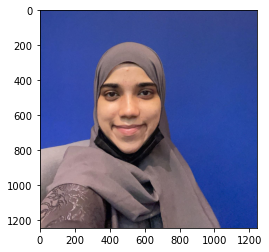

In [119]:
#MTCNN

import cv2
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
#loading the image
image1=plt.imread('madeeha.jpg')
plt.imshow(image1,cmap='gray')


In [120]:
model=MTCNN()
print(model)

In [121]:
result = model.detect_faces(image1)

1/1 [==============================] - 0s 202ms/step


In [122]:
#see the result
result

[{'box': [290, 256, 402, 534],
  'confidence': 0.999516487121582,
  'keypoints': {'left_eye': (407, 479),
   'right_eye': (604, 475),
   'nose': (509, 591),
   'mouth_left': (412, 665),
   'mouth_right': (608, 654)}}]

In [123]:
face=len(result)

In [124]:
face

1

In [125]:
for i in range(0,face):
    box = result[i]['box']
    confidenc = result[i]['confidence']
    print(box)
    print(confidenc)
    if confidenc > 0.6:
        cv2.rectangle(image1,(box[0],box[1]),(box[0]+box[2],box[1]+box[3]),(0,255,0),6)



[290, 256, 402, 534]
0.999516487121582


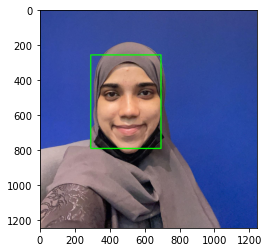

In [126]:
plt.imshow(image1)

In [127]:
#image segemtnation using hsv
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from skimage.color import rgb2gray,rgb2hsv
from skimage.filters import threshold_otsu
from skimage.feature import hog

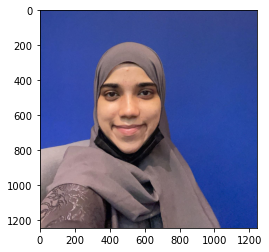

In [128]:
image= imread('madeeha.jpg')
plt.imshow(image)

In [129]:
image_gs=rgb2gray(image)

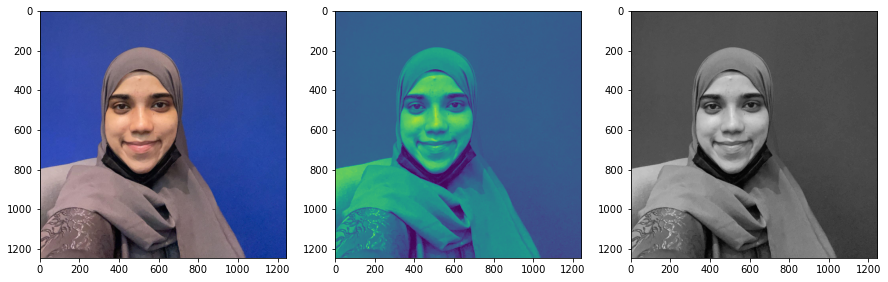

In [130]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
plt.imshow(image_gs,cmap='gray')
ax[0].imshow(image)
ax[1].imshow(image_gs)

(array([5.0900e+02, 7.9800e+02, 1.2200e+03, 1.7260e+03, 2.0440e+03,
        2.2170e+03, 2.1200e+03, 2.4260e+03, 2.2750e+03, 2.1920e+03,
        1.9820e+03, 1.5100e+03, 1.6510e+03, 1.3880e+03, 1.3200e+03,
        1.1540e+03, 1.2750e+03, 1.1820e+03, 1.1020e+03, 1.0370e+03,
        1.0150e+03, 1.0410e+03, 9.8700e+02, 9.7800e+02, 1.0300e+03,
        1.0500e+03, 1.0620e+03, 1.1710e+03, 1.1420e+03, 1.2430e+03,
        1.1790e+03, 1.2340e+03, 1.2990e+03, 1.2320e+03, 1.3110e+03,
        1.2830e+03, 1.3400e+03, 1.3300e+03, 1.2700e+03, 1.3530e+03,
        1.3420e+03, 1.4060e+03, 1.3450e+03, 1.3630e+03, 1.5060e+03,
        1.4900e+03, 1.6300e+03, 1.7440e+03, 1.9110e+03, 2.1140e+03,
        2.3460e+03, 2.5790e+03, 3.0890e+03, 3.5600e+03, 3.8900e+03,
        4.6860e+03, 5.3670e+03, 6.5970e+03, 6.9850e+03, 8.4610e+03,
        9.5250e+03, 9.7930e+03, 1.1340e+04, 1.1341e+04, 1.3176e+04,
        1.4449e+04, 1.6568e+04, 1.7021e+04, 2.1126e+04, 2.7027e+04,
        3.1222e+04, 3.8440e+04, 4.7732e+04, 5.87

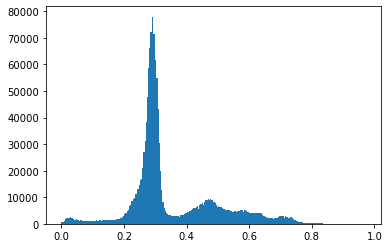

In [131]:
plt.hist(image_gs.flatten(),bins=256)

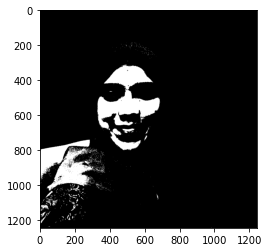

In [132]:
threshold=0.6
threshold_image=image_gs>threshold
plt.imshow(threshold_image,cmap='gray')

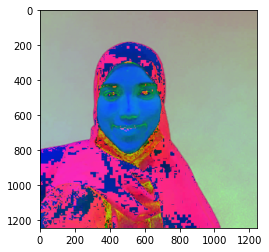

In [133]:
image_hsv=rgb2hsv(image)
image_hsv.shape
plt.imshow(image_hsv,cmap='gray')

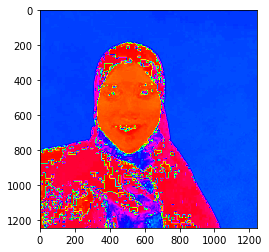

In [134]:
image_h=image_hsv[:,:,0]
plt.imshow(image_h,cmap='hsv')

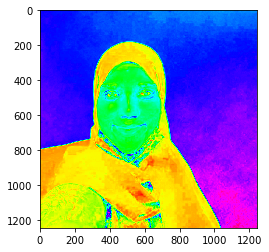

In [135]:
image_s=image_hsv[:,:,1]
plt.imshow(image_s,cmap='hsv')

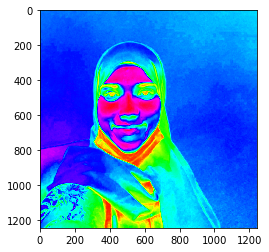

In [136]:
image_v=image_hsv[:,:,2]
plt.imshow(image_v,cmap='hsv')

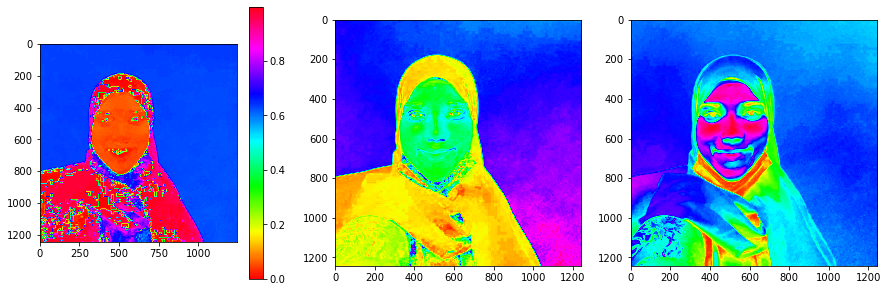

In [137]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
im=ax[0].imshow(image_h,cmap='hsv')
ax[1].imshow(image_s,cmap='hsv')
ax[2].imshow(image_v,cmap='hsv')
fig.colorbar(im,ax=ax[0])

In [138]:
lower_mask=image_hsv[:,:,0]>0.025
upper_mask=image_hsv[:,:,0]<0.15
mask=lower_mask*upper_mask

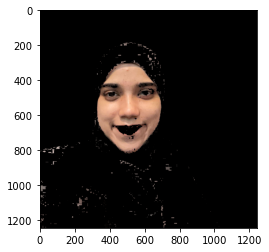

In [139]:
image_red=image[:,:,0]*mask
image_green=image[:,:,1]*mask
image_blue=image[:,:,2]*mask
segmented_image=np.dstack((image_red,image_green,image_blue))
plt.imshow(segmented_image)

In [140]:
#trying kmeans clustering face segemntation
from sklearn.cluster import KMeans

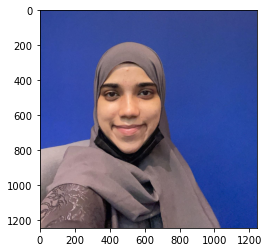

In [141]:
kimage = cv2.imread('madeeha.jpg')
kimage = cv2.cvtColor(kimage,cv2.COLOR_BGR2RGB)
plt.imshow(kimage)

In [142]:
kimage.shape

(1245, 1242, 3)

In [143]:
#reshaping the image
img2d = kimage.reshape((-1,3))
img2d.ndim

2

In [144]:
img2d.shape

(1546290, 3)

In [145]:
print(img2d)

[[ 47  68 151]
 [ 46  67 150]
 [ 45  66 149]
 ...
 [  5  38 141]
 [ 21  54 157]
 [ 21  54 157]]


In [146]:
#converting to 32 bit float
img2d = np.float32(img2d)
img2d

array([[ 47.,  68., 151.],
       [ 46.,  67., 150.],
       [ 45.,  66., 149.],
       ...,
       [  5.,  38., 141.],
       [ 21.,  54., 157.],
       [ 21.,  54., 157.]], dtype=float32)

for 1 cluster the inertia is 8822423552.0
for 2 cluster the inertia is 3488790784.0
for 3 cluster the inertia is 1741301888.0
for 4 cluster the inertia is 1002764800.0
for 5 cluster the inertia is 721744576.0
for 6 cluster the inertia is 592360320.0
for 7 cluster the inertia is 517170688.0
for 8 cluster the inertia is 442695648.0
for 9 cluster the inertia is 378241856.0


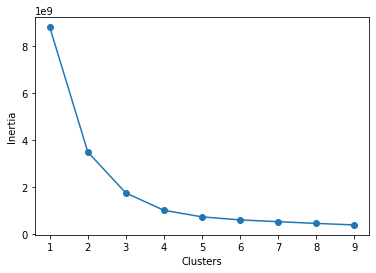

In [147]:
import pandas as pd
inertia = []
for i in range(1,10):
    algo = KMeans(n_clusters = i,init = 'k-means++')
    algo.fit(img2d)
    print(f'for {i} cluster the inertia is {algo.inertia_}')
    inertia.append(algo.inertia_)

elbow = pd.DataFrame({'Clusters':range(1,10),'Inertia':inertia})
plt.plot(elbow['Clusters'],elbow['Inertia'],marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()



In [148]:
#to cut the pixel of the image into 3 groups
compact,labels,centers = cv2.kmeans(img2d,3,(cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS,100,0.85),None,10,cv2.KMEANS_PP_CENTERS)


In [149]:
#to see the 3 groups
compact

1741652353.613296

In [150]:
#checking the dimension of labels
print(labels.ndim)
labels.shape

2


(1546290, 1)

In [151]:
print(centers)
centers = np.uint8(centers)




[[160.45326  130.91005  126.03183 ]
 [ 46.699165  71.38094  158.48764 ]
 [ 65.73382   53.368618  56.077435]]


In [152]:
centers

array([[160, 130, 126],
       [ 46,  71, 158],
       [ 65,  53,  56]], dtype=uint8)

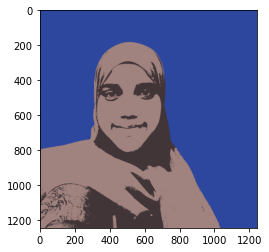

In [153]:
#implementing kmeans image segementation
ksegmentimage = centers[labels.flatten()]
ksegmentimage = ksegmentimage.reshape(kimage.shape)
plt.imshow(ksegmentimage)

In [154]:
#training model for svm with hog feature extraction
#import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

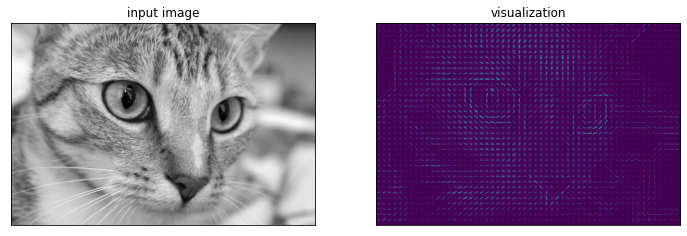

In [155]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vector, hog_visual = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_visual)
ax[1].set_title('visualization');
#we have defined the facial feature the next step is to obtain a set of positive and negative patches for training

In [210]:
#the first step is to obtain a series of positive training samples
from sklearn.datasets import fetch_lfw_people
positive_face = fetch_lfw_people()
positive_patch = positive_face.images
positive_patch.shape


(13233, 62, 47)

In [211]:
#now we will get a set of negative samples (things that wont be considered in face detection)
from skimage import data, transform

images_sample = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
raw_images = (getattr(data, name)() for name in images_sample)
images = [color.rgb2gray(image) if image.ndim == 3 else image
          for image in raw_images]


In [212]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patch[0].shape):
    extract_size = tuple((scale * np.array(patch_size)).astype(int))
    extract = PatchExtractor(patch_size=extract_size,
                               max_patches=N, random_state=0)
    patches = extract.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patch = np.vstack([extract_patches(im, 100, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patch.shape

(3000, 62, 47)

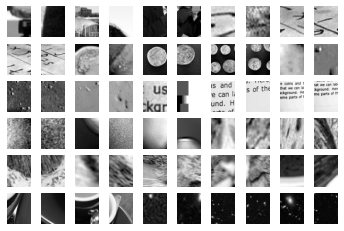

In [213]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patch[50 * i], cmap='gray')
    axi.axis('off')

In [214]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patch,
                                    negative_patch)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patch.shape[0]] = 1


In [215]:
X_train.shape

(16233, 1215)

In [216]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)


array([0.9421004 , 0.93717277, 0.9380967 , 0.93807763, 0.94054221])

In [217]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

C:\Users\aryso\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aryso\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aryso\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aryso\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\aryso\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.985338264753986

In [218]:
svm_model = grid.best_estimator_
svm_model.fit(X_train, y_train)

LinearSVC()

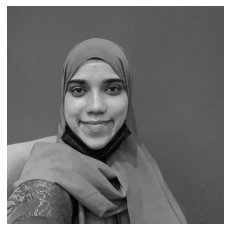

In [219]:
import cv2
#trying it out with the test image
testimage = cv2.imread('madeeha.jpg')
testimage = skimage.color.rgb2gray(testimage)
plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [220]:
def window(img, patch_size=positive_patch[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*window(testimage))
patches_hog = np.array([feature.hog(patch) for patch in patches[:1000]])
patches_hog.shape


(1000, 1215)

In [221]:
labels = svm_model.predict(patches_hog)
labels.sum()



1.0

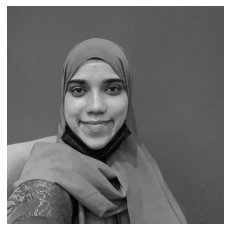

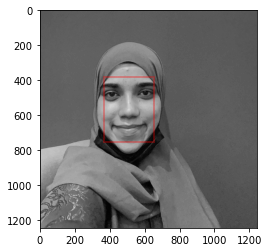

In [222]:
fig, ax = plt.subplots()
ax.imshow(testimage, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patch[0].shape
indices = np.array(indices)

#to adjust the sizes
true_indices = np.where(labels == 1)[0]
selected_indices = indices[true_indices]

# Now, you can iterate over the selected indices
fig, ax = plt.subplots()
ax.imshow(testimage, cmap='gray')
ax.add_patch(plt.Rectangle((370,380), Nj*6, Ni*6, edgecolor='red',
                           alpha=0.3, lw=2, facecolor='none'))
plt.show()

